In [21]:
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential, load_model, Model, save_model
from tensorflow.keras.layers import Dense, AveragePooling2D, Flatten, InputLayer, Conv2D, Dropout, MaxPooling2D, BatchNormalization, Input
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [39]:
def data_load():
    (Xtrain, Ytrain), (Xtest, Ytest) = cifar10.load_data()

    Xtrain = Xtrain.astype('float32') / 250.
    Xtest = Xtest.astype('float32') / 250.
    return (Xtrain, Ytrain, Xtest, Ytest)

def create_model():
    CNN = Sequential([
        InputLayer(input_shape=(32, 32, 3)),
        Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', name="C1"),
        BatchNormalization(name="BN1"),
        Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', name="C2"),
        BatchNormalization(name="BN2"),
        AveragePooling2D(pool_size=(2, 2), strides=(2,2), name="P1"),
        Dropout(rate=0.2, name="D1"),
        Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same', name="C3"),
        BatchNormalization(name="BN3"),
        Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same', name="C4"),
        BatchNormalization(name="BN4"),
        AveragePooling2D(pool_size=(2,2), strides=(2,2), name="P2"),
        Dropout(rate=0.2, name="D2"),
        Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same', name="C5"),
        BatchNormalization(name="BN5"),
        Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same', name="C6"),
        BatchNormalization(name="BN6"),
        AveragePooling2D(pool_size=(2, 2), strides=(2,2), name="P3"),
        Dropout(rate=0.3, name="D3"),
        Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same', name="C7"),
        BatchNormalization(name="BN7"),
        Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same', name="C8"),
        BatchNormalization(name="BN8"),
        AveragePooling2D(pool_size=(2, 2), strides=(2,2), name="P4"),
        Dropout(rate=0.3, name="D4"),
        Flatten(name="F"),
        Dense(units=84, activation="tanh", name="Dense_1"),
        Dense(units=10, activation="softmax", name="Predict")
    ])
    CNN.compile(loss=SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])
    return CNN

def plots(history, num_epochs):
    test_losses = history.history["loss"]
    test_accuracies = history.history["accuracy"]
    val_losses = history.history["val_loss"]
    val_accuracies = history.history["val_accuracy"]
    timeline = list(range(num_epochs))

    plt.plot(timeline, test_losses, label="Test Loss")
    plt.plot(timeline, val_losses, label="Validation Loss")
    plt.legend()
    plt.show()
    plt.plot(timeline, test_accuracies, label="Test Accuracy")
    plt.plot(timeline, val_accuracies, label="Validation Accuracy")
    plt.legend()
    plt.show()

def accuracy(Yhat, Ytrue):
    correct = 0
    for i in range(len(Ytrue)):
    if np.argmax(Yhat[i]) == Ytrue[i]:
        correct += 1
    return correct/len(Ytrue)

In [19]:
Xtrain, Ytrain, Xtest, Ytest = data_load()
model = create_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
C1 (Conv2D)                  (None, 32, 32, 32)        896       
_________________________________________________________________
BN1 (BatchNormalization)     (None, 32, 32, 32)        128       
_________________________________________________________________
C2 (Conv2D)                  (None, 32, 32, 32)        9248      
_________________________________________________________________
BN2 (BatchNormalization)     (None, 32, 32, 32)        128       
_________________________________________________________________
P1 (AveragePooling2D)        (None, 16, 16, 32)        0         
_________________________________________________________________
D1 (Dropout)                 (None, 16, 16, 32)        0         
_________________________________________________________________
C3 (Conv2D)                  (None, 16, 16, 64)       

In [20]:
num_epochs=100
history = model.fit(Xtrain, Ytrain, epochs=num_epochs, batch_size=128, validation_data = (Xtest, Ytest), verbose=1)

Epoch 1/100
391/391 [==============================] - 7s 17ms/step - loss: 1.3784 - accuracy: 0.5026 - val_loss: 2.6630 - val_accuracy: 0.2542
Epoch 2/100
391/391 [==============================] - 6s 16ms/step - loss: 0.9063 - accuracy: 0.6816 - val_loss: 0.8088 - val_accuracy: 0.7227
Epoch 3/100
391/391 [==============================] - 6s 16ms/step - loss: 0.7379 - accuracy: 0.7423 - val_loss: 0.7109 - val_accuracy: 0.7610
Epoch 4/100
391/391 [==============================] - 6s 16ms/step - loss: 0.6322 - accuracy: 0.7802 - val_loss: 0.7605 - val_accuracy: 0.7501
Epoch 5/100
391/391 [==============================] - 6s 16ms/step - loss: 0.5615 - accuracy: 0.8044 - val_loss: 0.6052 - val_accuracy: 0.7943
Epoch 6/100
391/391 [==============================] - 6s 16ms/step - loss: 0.5074 - accuracy: 0.8253 - val_loss: 0.5874 - val_accuracy: 0.8049
Epoch 7/100
391/391 [==============================] - 6s 16ms/step - loss: 0.4557 - accuracy: 0.8424 - val_loss: 0.5213 - val_accuracy:

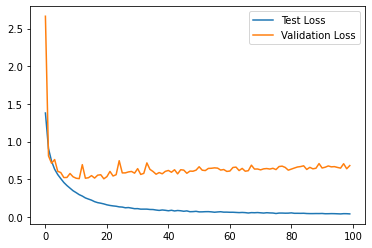

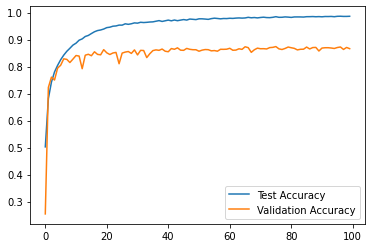

In [22]:
plots(history, num_epochs)

In [23]:
model.save("cifar10_model.h5")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: cifar10_model/assets


In [24]:
reconstructed_model = load_model("cifar10_model.h5")

In [60]:
# reconstructed_model.summary()
model2 = Model(reconstructed_model.input, reconstructed_model.layers[-3].output)
model2.summary()
model2.save("cifar10_feature_map.h5")
print(accuracy(model2.predict(Xtest), Ytest))

Model: "functional_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
C1 (Conv2D)                  (None, 32, 32, 32)        896       
_________________________________________________________________
BN1 (BatchNormalization)     (None, 32, 32, 32)        128       
_________________________________________________________________
C2 (Conv2D)                  (None, 32, 32, 32)        9248      
_________________________________________________________________
BN2 (BatchNormalization)     (None, 32, 32, 32)        128       
_________________________________________________________________
P1 (AveragePooling2D)        (None, 16, 16, 32)        0         
_________________________________________________________________
D1 (Dropout)                 (None, 16, 16, 32)      

In [58]:
reconstructed_feature_map = load_model("cifar10_feature_map")
# print(accuracy(reconstructed_feature_map.predict(Xtest), Ytest))

0.8664
